# Are people who attended college less religious?

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
from __future__ import print_function, division

%matplotlib inline

import pandas as pd
import numpy as np

import thinkstats2
import thinkplot
import utils

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

Reading data from the [General Social Survey](https://gssdataexplorer.norc.org/projects/29853)

In [2]:
gss = utils.ReadGss('gss_college_religion')
print(gss.shape)
gss.head()

(62466, 8)


,year,id_,educ,relig,ballot,wtssall,age,cohort
0,1972,1,16,3,0,0.4446,23,1949
1,1972,2,10,2,0,0.8893,70,1902
2,1972,3,12,1,0,0.8893,48,1924
3,1972,4,17,5,0,0.8893,27,1945
4,1972,5,12,1,0,0.8893,61,1911


Resampling (bootstrapping to be more specific) to account for sampling weights.

In [3]:
sample = utils.ResampleByYear(gss)
sample.head()

,year,id_,educ,relig,ballot,wtssall,age,cohort
0,1972,212,10,1,0,0.8893,45,1927
1,1972,1581,6,1,0,0.8893,55,1917
2,1972,503,17,1,0,0.4446,28,1944
3,1972,1423,14,1,0,0.8893,21,1951
4,1972,1398,11,2,0,0.8893,35,1937


Cleaning variables

In [4]:
utils.fill_missing(sample, 'educ')

141

In [5]:
utils.values(sample, 'educ')

0.0       160
1.0        39
2.0       141
3.0       237
4.0       279
5.0       383
6.0       833
7.0       839
8.0      2455
9.0      1938
10.0     2788
11.0     3832
12.0    19347
13.0     5354
14.0     6872
15.0     2887
16.0     7814
17.0     1878
18.0     2230
19.0      820
20.0     1340
Name: educ, dtype: int64

Anyone with 13 or more years of school is considered to have some college.

In [6]:
sample['college'] = sample.educ >= 13
sample.college.mean()

0.4673742515928665

Religion code 4 represents people who report no religious affiliation.

In [7]:
utils.fill_missing(sample, 'relig')

269

In [8]:
utils.values(sample, 'relig')

1.0     35548
2.0     15820
3.0      1231
4.0      7244
5.0      1037
6.0       157
7.0        94
8.0        36
9.0       177
10.0      130
11.0      832
12.0       33
13.0      127
Name: relig, dtype: int64

In [9]:
sample['none'] = sample.relig ==4
sample.none.mean()

0.11596708609483559

Group by year and college status.

In [10]:
grouped = sample.groupby(['year', 'college'])

Plot fraction of "Nones" by year for the college and no-college groups.

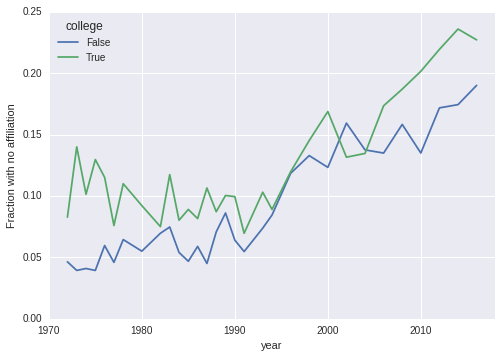

In [11]:
percent_none = grouped.none.mean().unstack()
percent_none.plot()
plt.ylabel('Fraction with no affiliation')
plt.xlim([1970, 2018]);

Plot the difference in percentage points between the college and no-college groups.

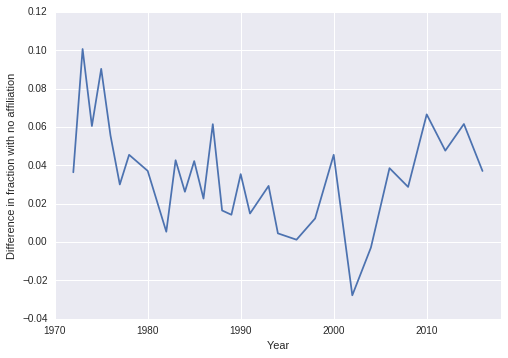

In [12]:
diff = percent_none[True] - percent_none[False]
plt.plot(diff)
plt.xlabel('Year');
plt.ylabel('Difference in fraction with no affiliation')
plt.xlim([1970, 2018]);

Estimate the fraction of people in the college-age population with no affiliation.

In [13]:
college_none = 30.9
no_college_none = college_none - 6
fraction_college = 0.65
fraction_no_college = 1-fraction_college

fraction_none = fraction_college * college_none + fraction_no_college * no_college_none
fraction_none

28.799999999999997

In [14]:
college_none - 0.35 * 6

28.799999999999997